1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

<AxesSubplot: xlabel='features_1', ylabel='features_3'>

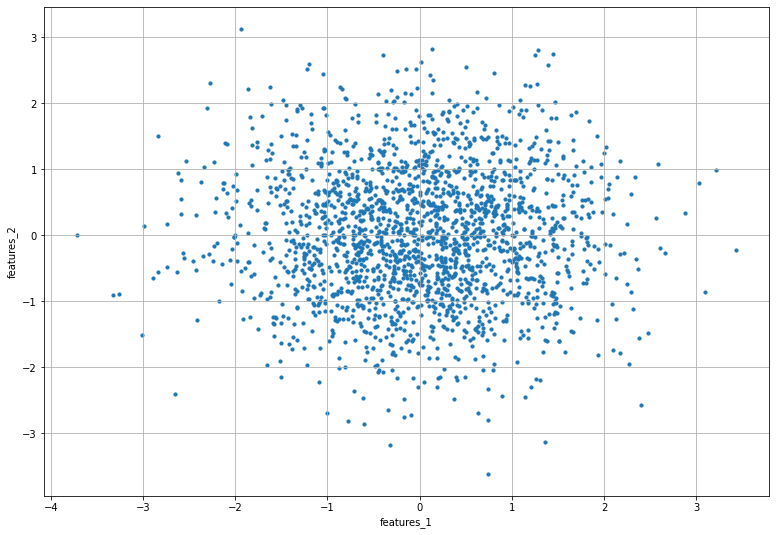

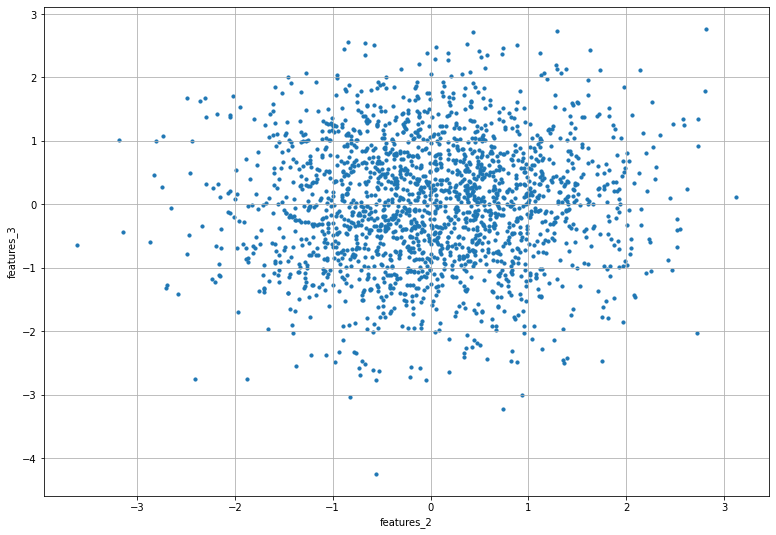

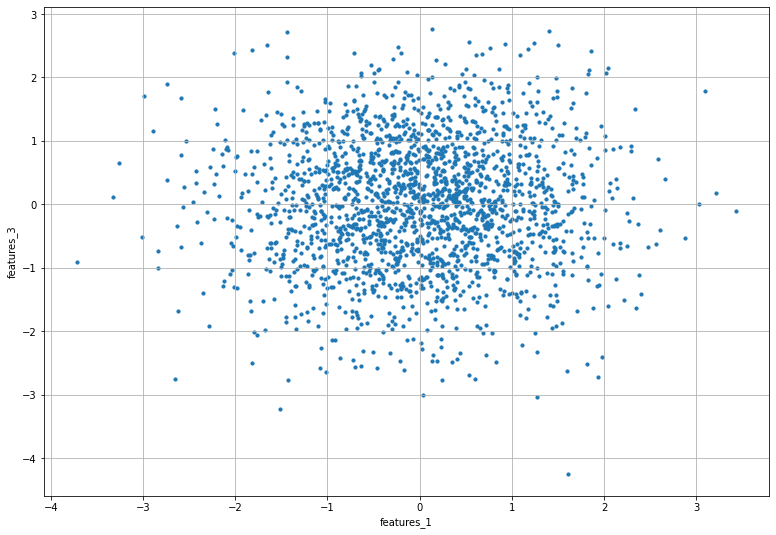

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

d=pd.read_csv('regression_generated.csv',header=0)
feat1_2=d[['features_1','features_2']]
feat2_3=d[['features_2','features_3']]
feat1_3=d[['features_1','features_3']]
d.plot.scatter("features_1","features_2",10,figsize=(13,9),grid=1)
d.plot.scatter("features_2","features_3",10,figsize=(13,9),grid=1)
d.plot.scatter("features_1","features_3",10,figsize=(13,9),grid=1)
#As we can see from the plots, the features are not correlated with each other

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

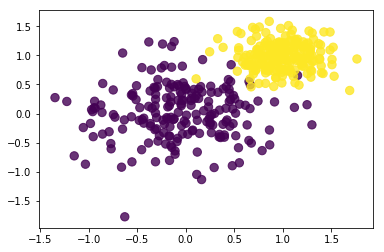

In [51]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')


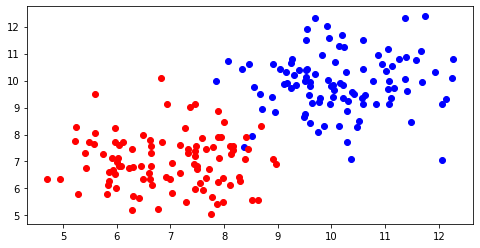

In [59]:
mean1=10
std1=1
mean2=7
std2=1
numv=100
d=pd.DataFrame()
axy=np.arange(100)
d1_1=mean1+std1*np.random.randn(numv)
d1_2=mean1+std1*np.random.randn(numv)
d2_1=mean2+std2*np.random.randn(numv)
d2_2=mean2+std2*np.random.randn(numv)
#d1=list(map(list,zip(d1_1,d1_2)))
#d2=list(map(list,zip(d2_1,d2_2)))
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.scatter(d1_1,d1_2,marker='o', c='b', edgecolor='b')
ax1.scatter(d2_1,d2_2,marker='o', c='r', edgecolor='r')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
[ 0.      1.0375  2.075   3.1125  4.15    5.1875  6.225   7.2625  8.3
  9.3375 10.375  11.4125 12.45   13.4875 14.525  15.5625 16.6    17.6375
 18.675  19.7125 20.75   21.7875 22.825  23.8625 24.9   ]
[ 0.51875  1.55625  2.59375  3.63125  4.66875  5.70625  6.74375  7.78125
  8.81875  9.85625 10.89375 11.93125 12.96875 14.00625 15.04375 16.08125
 17.11875 18.15625 19.19375 20.23125 21.26875 22.30625 23.34375 24.38125]


Text(0.5, 1.0, 'Scatter of residuals over distances with errorbars')

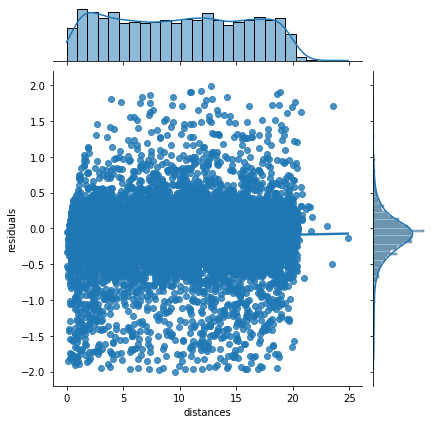

<Figure size 720x432 with 0 Axes>

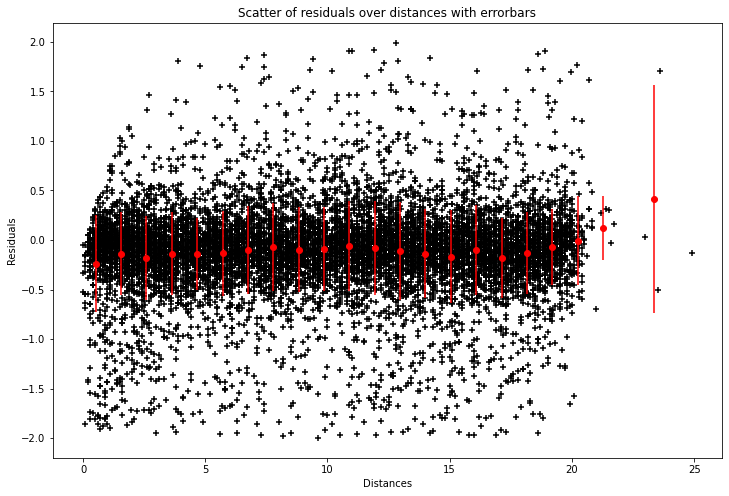

In [141]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import seaborn as sns
name='data/residuals_261.pkl'
f=pd.read_pickle(name).tolist()
df=pd.DataFrame(f)
df=df.query('abs(residuals)<2')
sns.jointplot(df,x='distances',y='residuals',kind='reg')
print(df)

#the 'residuals' seems to be normally distributed independently of the value of 'distances'.

fig = plt.figure(figsize=(10, 6))
#generate an histogram in order to get the bins centers
#h, lim, _ = plt.hist(df['distances'], bins=25, density=True, cumulative=False)
#compute the limits of the bins
lim=np.linspace(min(df['distances']),max(df['distances']),25)
print(lim)
x=np.zeros(len(lim)-1)
#compute the center of the bins
for i in range(len(lim)-1):
    x[i]=(lim[i]+lim[i+1])/2
print(x)
sum=0
y=np.zeros(len(x))
err_y=np.zeros(len(x))
for i in range(len(lim)-1):
    dm=df.query('distances>@lim[@i] and distances<@lim[@i+1]')
    y[i]=dm['residuals'].mean()
    err_y[i]=dm['residuals'].std()
fig1 = plt.figure(figsize=(12, 8))
plt.scatter(x=df['distances'],y=df['residuals'],marker='+',color='black')
plt.errorbar(x,y,yerr=err_y,ecolor='red',fmt='o',color='red')
ax = fig1.axes[0]
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
ax.set_title('Scatter of residuals over distances with errorbars')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


[ 0.  0.  0.  0.  1.  1.  0.  1.  2.  3.  3.  5.  1.  3.  5. 11.  5.  3.
  1.  9.  5.  8.  6.  7.  4.  1.  1.  5.  2.  1.  3.  2.  0.  0.  0.  0.
  0.  1.  0.  0.]
1.6249893986468624


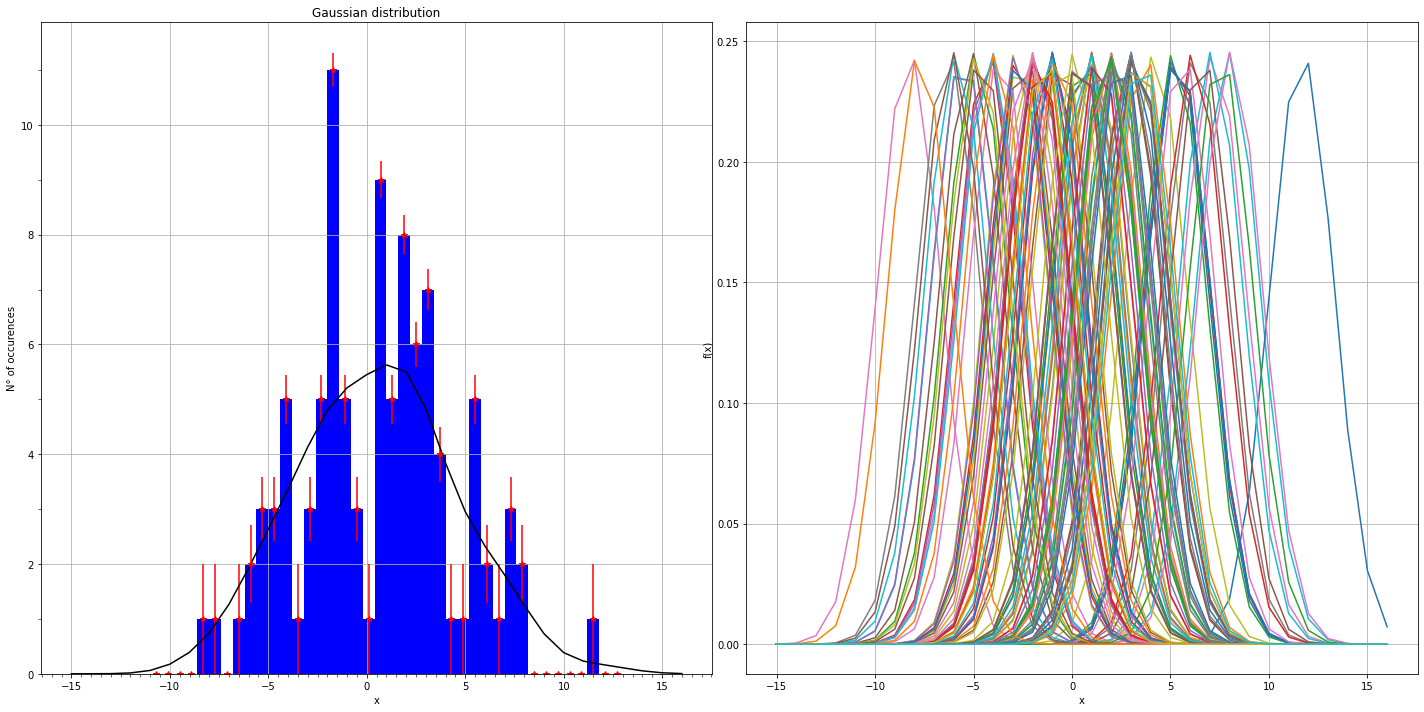

In [137]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import scipy as sp
import math
mean=1
std=4
N=100
x=np.random.normal(loc=mean,scale=std,size=N)
range_x=(mean-3*std,mean+3*std)
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
y,bins,_=axs[0].hist(x,bins=40,range=range_x,density=False,cumulative=False,color='blue')
print(y)
axs[0].set_title('Gaussian distribution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('N° of occurences')
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
axs[0].tick_params(which='minor', length=3)
axs[0].grid(True)
binsc=np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    binsc[i]=(bins[i]+bins[i+1])/2
err_y=np.zeros(len(y))
for i in range(len(y)):
    if y[i]==0:
        err_y[i]=0
    else:
        err_y[i]=1/math.sqrt(y[i])
axs[0].errorbar(binsc,y,err_y,ecolor='red',fmt='*',color='red')
fig.tight_layout()

std1=1.06*x.std()*(x.size**-0.2)
print(std1)
g=[]
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].grid()
range_x=np.arange(mean-4*std,mean+4*std)
for i in range(len(x)):
    g_i=sp.stats.norm(loc=x[i],scale=std1).pdf(range_x)
    axs[1].plot(range_x,g_i)
    g.append(g_i)
g_sum=np.sum(g,axis=0)
a_hist=sp.integrate.trapz(y,dx=bins[1]-bins[0])
g_norm=g_sum/sum(g_sum)*a_hist
axs[0].plot(range_x,g_norm,color='black')
plt.show()